In [7]:
!pip install mplbasketball

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 101.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
pytensor 2.37.0 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
tobler 0.13.0 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.13.0.90 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
rasterio 1.5.0 requires numpy>=2, but you have numpy 1.26.4 which is i

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mexwell/nba-shots")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'nba-shots' dataset.
Path to dataset files: /kaggle/input/nba-shots


In [4]:
import os

# List contents of the directory
file_list = os.listdir(path)
print(f"Files in {path}:\n{file_list}")

Files in /kaggle/input/nba-shots:
['NBA_2022_Shots.csv', 'NBA_2021_Shots.csv', 'NBA_2019_Shots.csv', 'NBA_2020_Shots.csv', 'NBA_2006_Shots.csv', 'NBA_2009_Shots.csv', 'NBA_2016_Shots.csv', 'NBA_2011_Shots.csv', 'NBA_2004_Shots.csv', 'NBA_2015_Shots.csv', 'NBA_2013_Shots.csv', 'NBA_2014_Shots.csv', 'NBA_2008_Shots.csv', 'NBA_2023_Shots.csv', 'NBA_2024_Shots.csv', 'NBA_2007_Shots.csv', 'NBA_2010_Shots.csv', 'NBA_2012_Shots.csv', 'NBA_2017_Shots.csv', 'NBA_2018_Shots.csv', 'NBA_2005_Shots.csv']


In [5]:
import pandas as pd

file_to_load = os.path.join(path, 'NBA_2024_Shots.csv')

df = pd.read_csv(file_to_load)

print(f"Successfully loaded {os.path.basename(file_to_load)} into a DataFrame with {len(df)} rows and {len(df.columns)} columns.")
print("First 5 rows of the DataFrame:")
print(df.head())

Successfully loaded NBA_2024_Shots.csv into a DataFrame with 218701 rows and 26 columns.
First 5 rows of the DataFrame:
   SEASON_1 SEASON_2     TEAM_ID           TEAM_NAME  PLAYER_ID   PLAYER_NAME  \
0      2024  2023-24  1610612764  Washington Wizards    1629673  Jordan Poole   
1      2024  2023-24  1610612764  Washington Wizards    1630166   Deni Avdija   
2      2024  2023-24  1610612764  Washington Wizards    1626145    Tyus Jones   
3      2024  2023-24  1610612764  Washington Wizards    1629673  Jordan Poole   
4      2024  2023-24  1610612764  Washington Wizards    1626145    Tyus Jones   

  POSITION_GROUP POSITION   GAME_DATE   GAME_ID  ...             BASIC_ZONE  \
0              G       SG  11-03-2023  22300003  ...  In The Paint (Non-RA)   
1              F       SF  11-03-2023  22300003  ...      Above the Break 3   
2              G       PG  11-03-2023  22300003  ...        Restricted Area   
3              G       SG  11-03-2023  22300003  ...        Restricted Area  

In [6]:
jbrunson_df = df[(df['PLAYER_NAME'] == 'Jalen Brunson') & (df['QUARTER'] == 4) & (df['MINS_LEFT'] < 2)].copy()
jbrunson_df['LOC_Y'] = 47 - jbrunson_df['LOC_Y']

print(f"DataFrame for Jalen Brunson's clutch shots created with {len(jbrunson_df)} rows and {len(jbrunson_df.columns)} columns.")
print("First 5 rows of Jalen Brunson's clutch shots DataFrame:")
print(jbrunson_df.head())

DataFrame for Jalen Brunson's clutch shots created with 77 rows and 26 columns.
First 5 rows of Jalen Brunson's clutch shots DataFrame:
       SEASON_1 SEASON_2     TEAM_ID        TEAM_NAME  PLAYER_ID  \
73239      2024  2023-24  1610612752  New York Knicks    1628973   
73240      2024  2023-24  1610612752  New York Knicks    1628973   
73243      2024  2023-24  1610612752  New York Knicks    1628973   
73244      2024  2023-24  1610612752  New York Knicks    1628973   
73414      2024  2023-24  1610612752  New York Knicks    1628973   

         PLAYER_NAME POSITION_GROUP POSITION   GAME_DATE   GAME_ID  ...  \
73239  Jalen Brunson              G       PG  11-03-2023  22300002  ...   
73240  Jalen Brunson              G       PG  11-03-2023  22300002  ...   
73243  Jalen Brunson              G       PG  11-03-2023  22300002  ...   
73244  Jalen Brunson              G       PG  11-03-2023  22300002  ...   
73414  Jalen Brunson              G       PG  11-24-2023  22300045  ...   

    

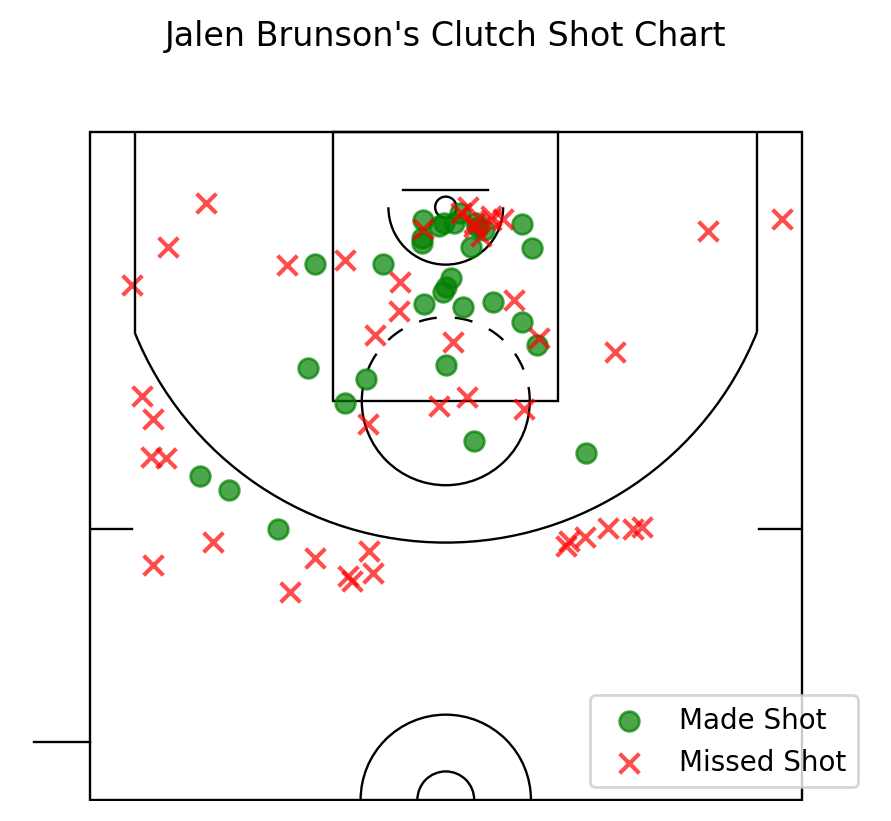

In [7]:
from matplotlib import pyplot as plt
from mplbasketball import Court


made_shots = jbrunson_df[jbrunson_df['SHOT_MADE'] == 1]
missed_shots = jbrunson_df[jbrunson_df['SHOT_MADE'] == 0]

court = Court(court_type="nba", origin="center", units="ft")
fig, ax = court.draw(showaxis=False, orientation="vu")


ax.scatter(made_shots['LOC_X'], made_shots['LOC_Y'], c='green', marker='o', s=50, label='Made Shot', alpha=0.7)
ax.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], c='red', marker='x', s=50, label='Missed Shot', alpha=0.7)

ax.set_title("Jalen Brunson's Clutch Shot Chart")
ax.legend()
plt.show()

In [11]:
def get_clutch_shooting_percentage(player_name):
  new_df = df[(df['PLAYER_NAME'] == player_name) & (df['QUARTER'] == 4) & (df['MINS_LEFT'] < 2)].copy()
  made_shots = new_df[new_df['SHOT_MADE'] == 1]
  missed_shots = new_df[new_df['SHOT_MADE'] == 0]

  total_shots = len(made_shots) + len(missed_shots)

  shooting_percentage = (len(made_shots) / total_shots) * 100
  return f"{shooting_percentage:.1f}%"

print(get_clutch_shooting_percentage('Devin Booker'))

52.5%


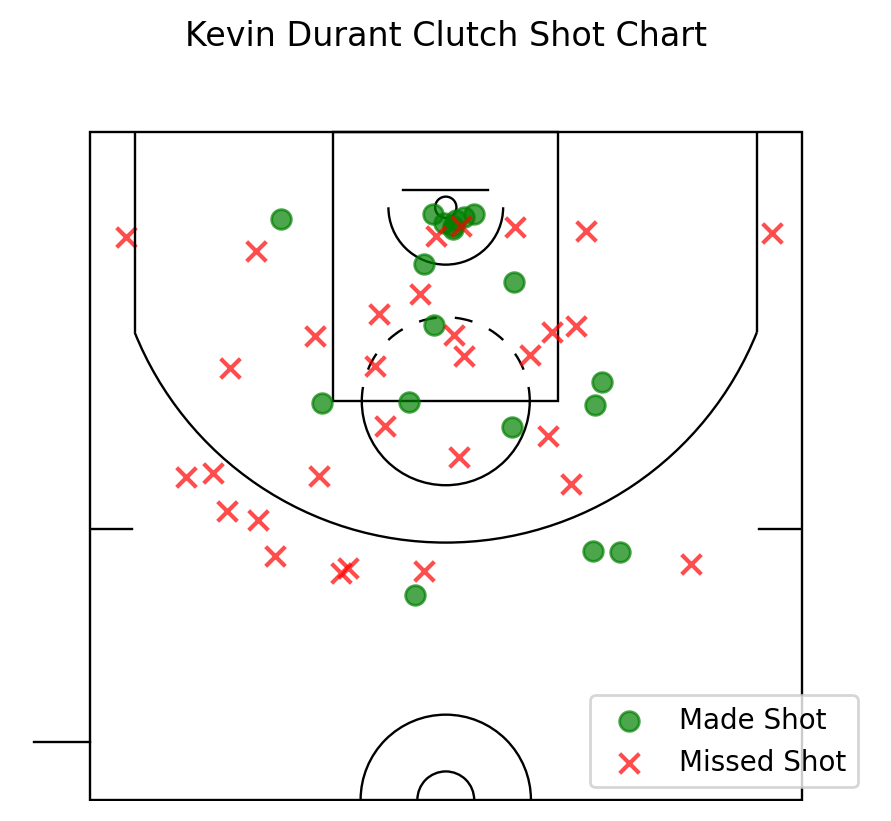

In [8]:
from matplotlib import pyplot as plt
from mplbasketball import Court
def clutch_shot_chart(player_name):
  new_df = df[(df['PLAYER_NAME'] == player_name) & (df['QUARTER'] == 4) & (df['MINS_LEFT'] < 2)].copy()
  new_df['LOC_Y'] = 47 - new_df['LOC_Y']
  made_shots = new_df[new_df['SHOT_MADE'] == 1]
  missed_shots = new_df[new_df['SHOT_MADE'] == 0]

  court = Court(court_type="nba", origin="center", units="ft")
  fig, ax = court.draw(showaxis=False, orientation="vu")


  ax.scatter(made_shots['LOC_X'], made_shots['LOC_Y'], c='green', marker='o', s=50, label='Made Shot', alpha=0.7)
  ax.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], c='red', marker='x', s=50, label='Missed Shot', alpha=0.7)

  ax.set_title(f"{player_name} Clutch Shot Chart")
  ax.legend()
  plt.show()

clutch_shot_chart('Kevin Durant')



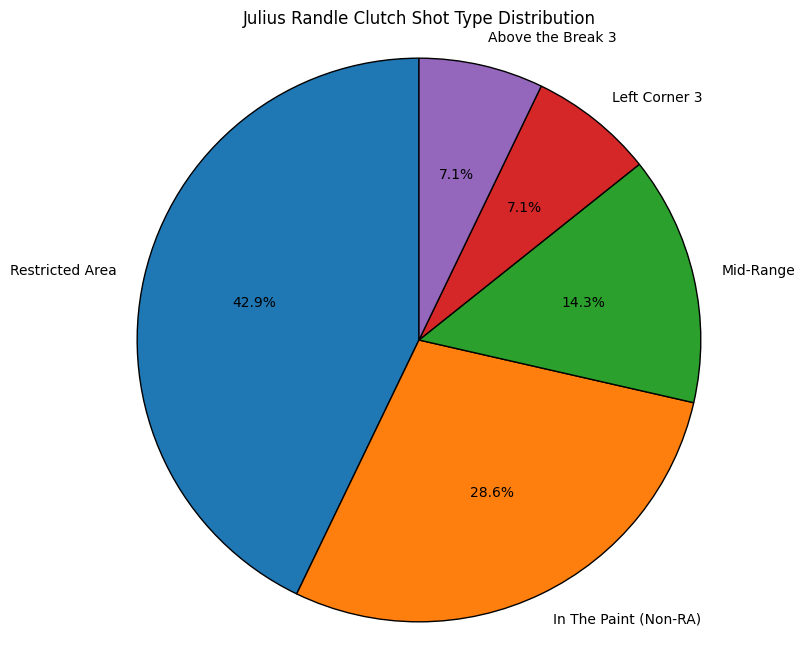

In [9]:
from matplotlib import pyplot as plt

def clutch_shot_types(player_name):
  new_df = df[(df['PLAYER_NAME'] == player_name) & (df['QUARTER'] == 4) & (df['MINS_LEFT'] < 2)].copy()

  shot_type_counts = new_df['BASIC_ZONE'].value_counts()

  fig, ax = plt.subplots(figsize=(8, 8))
  ax.pie(shot_type_counts, labels=shot_type_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
  ax.set_title(f'{player_name} Clutch Shot Type Distribution')
  ax.axis('equal')
  plt.show()

clutch_shot_types('Julius Randle')